In [49]:
import warnings; warnings.filterwarnings('ignore')

import pandas as pd 
import json
from pathlib import Path

from collections import OrderedDict
import numpy as np

import re
from collections import defaultdict

import spacy
from spacy.matcher import PhraseMatcher
from spacy.pipeline import EntityRuler

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

from yellowbrick.text import TSNEVisualizer, FreqDistVisualizer, dispersion

import rake_nltk

import matplotlib.pyplot as plt
%matplotlib inline 

In [72]:
def display_topics(model, feature_names, no_top_words=10, no_topics=10):
    no_topics = min(no_topics, len(model.components_)-1)
    for topic_idx, topic in enumerate(model.components_[:no_topics]):
        words = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(f'Topic {topic_idx}: {words}')
        
def show_freq(text):
    if isinstance(text, str):
        text = text.split()
        
    vectorizer = CountVectorizer()
    corpus = vectorizer.fit_transform(text)
    features = vectorizer.get_feature_names()

    plt.figure(figsize=(12,12))
    visualizer = FreqDistVisualizer(features=features, orient='h')
    visualizer.fit(corpus)
    visualizer.show();

In [2]:
nlp = spacy.load("en_core_web_lg")
from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
def clean(text):
    text = text.strip('[(),- :\'\"\n]\s*').lower()
    # text = re.sub('([A-Za-z0-9\)]{2,}\.)([A-Z]+[a-z]*)', r"\g<1> \g<2>", text, flags=re.UNICODE)
    text = re.sub('\s+', ' ', text, flags=re.UNICODE).strip()
    text = re.sub('","', ' ', text, flags=re.UNICODE).strip()
    text = re.sub('-', ' ', text, flags=re.UNICODE).strip()
    # text = re.sub('\(', ' ', text, flags=re.UNICODE).strip()
    # text = re.sub('\)', ' ', text, flags=re.UNICODE).strip()
    text = re.sub('\/', ' ', text, flags=re.UNICODE).strip()
    text = text.replace("\\", ' ')

    text = ' '.join(text.split())

    if (text[len(text) - 1] != '.'):
        text += '.'

    return text

In [22]:
input_path = Path('../../data/subset')
output_path = Path('../../data/subset_txt')

In [29]:
for filename in input_path.iterdir():
    
    with open(filename, 'r') as f:
        text = json.load(f)
    
    if len(text) == 0:
        continue
        
    for sent in text:
        sents.append(' '.join([w.lemma_ for w in nlp(clean(sent)) if (w.is_alpha and not w.is_stop)]))
    
    text = '. '.join(sents)
    out_file = output_path / filename.with_suffix('.txt').name
    
    with open(out_file, 'w') as f:
        f.write(text)

In [37]:
docs = []
    
for filename in path.glob('*.txt'):
    with open(filename, 'r') as f:
        docs.append(f.read())

In [ ]:
no_features = 1000
no_topics = 20

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(docs)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [ ]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(docs)
tf_feature_names = tf_vectorizer.get_feature_names()

In [69]:
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

display_topics(nmf, tfidf_feature_names)

Topic 0: area tenement gold project exploration report drilling drill sample survey
Topic 1: kurnalpi property avoca bedrock sequence shear fault intrusive carrick northeast
Topic 2: ashburton formation iron hamersley wyloo group creek giralia mt dolomite
Topic 3: claim geoscience australia accept error supply display datum maintain composition
Topic 4: quantum terrane limit gindalbie resource western assemblage greenstone deformation australia
Topic 5: fluid creek fault blue sandstone shear alter belt gold zone
Topic 6: diamond kimberlite area creek page historical kimberley original study company
Topic 7: aztec ip dome coogee kambalda gravity zonge datum plagioclase lefroy
Topic 8: potash basin gascoyne formation target drillhole figure gravity area seismic
Topic 9: model wireframe resource offset working march block development remain apply


In [70]:
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

display_topics(lda, tf_feature_names)

Topic 0: project tenement area report exploration rock gold drilling nickel survey
Topic 1: tenement area report project exploration gold complete resource drill survey
Topic 2: area tenement figure datum exploration formation mineralisation project sample resource
Topic 3: area project report exploration datum sample diamond result figure rock
Topic 4: area north fault tenement project gold exploration sequence rock western
Topic 5: survey project area work exploration rock ultramafic sample report unit
Topic 6: project formation ashburton hand range pron chip plagioclase dome area
Topic 7: gold report tenement mineralisation project resource area sample rock exploration
Topic 8: exploration tenement report project rock gold formation area iron western
Topic 9: exploration drill area datum soil resource line report result australia


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


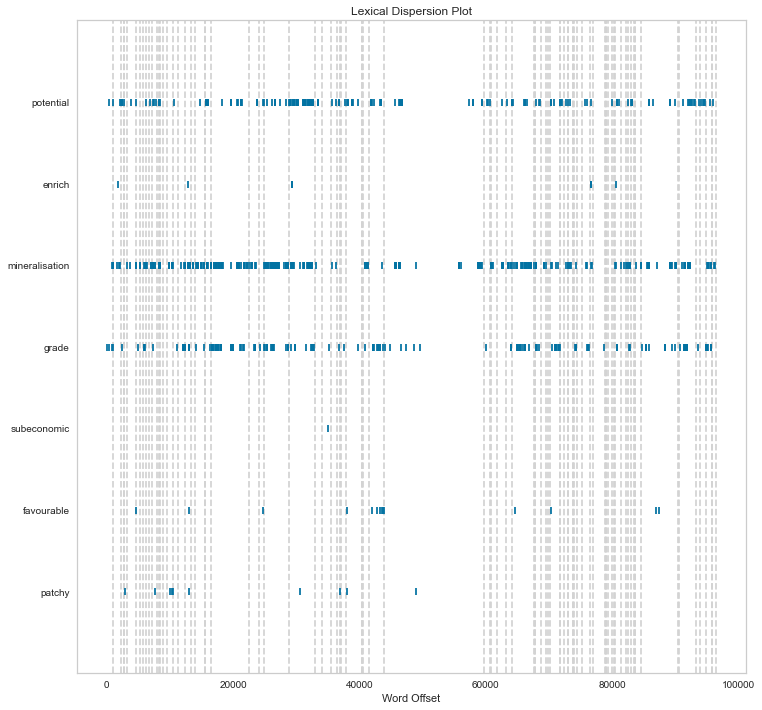

In [71]:
text = [doc.split() for doc in docs]

target_words = ['potential', 'enrich', 'mineralisation', 'grade', 'subeconomic', 'favourable', 'patchy']

plt.figure(figsize=(12,12))
dispersion(target_words, text, annotate_docs=True);

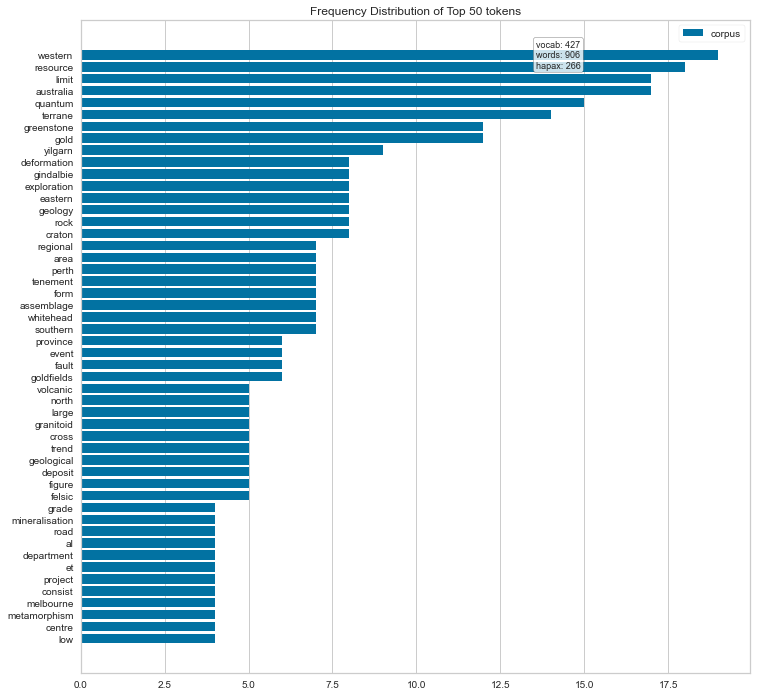

In [73]:
show_freq(docs[0])

In [74]:
from rake_nltk import Rake

r = Rake()

r.extract_keywords_from_text(docs[0])

r.get_ranked_phrases()[:10]

['plot figure quantum resource limit metre whitehead geology quantum resource limit melbourne geology perth wiluna leonorageraldton kalgoorlie gindalbie legend geology czl laterite afp porphyric felsic rock afv felsic volcanic volcaniclastic rocks aog gabbro czc colluvium quantum resource limit',
 'white raza date december private confidential copy distribute level st kilda road melbourne victoria australia telephone facsimile distribution department industry resource perth quantum resource limit melbourne quantum resource limit',
 'plot figure quantum resource limit kilometre whitehead location quantum resource limit melbourne location perth wiluna leonorageraldton kalgoorlie gindalbie legend population centre road water course quantum resource limit',
 'yilgarn craton consist ga granitioid greenstone terrane eastern goldfields southern cross murchison province ga high grade gneiss complex greenstone south western gneiss terrane ho et al',
 'northwest tenement cover small area cainozo